In [1]:
!pip install scikit-multilearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, accuracy_score
import warnings
warnings.filterwarnings('ignore')  

  Using cached scikit_multilearn-0.2.0-py3-none-any.whl.metadata (6.0 kB)
Using cached scikit_multilearn-0.2.0-py3-none-any.whl (89 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load dataset
data = pd.read_csv(r'C:\Users\Tejas\OneDrive\Desktop\CORAL\data\coral_reef_sites.csv')

# Display basic information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10000 non-null  int64  
 1   region                       10000 non-null  object 
 2   depth                        10000 non-null  float64
 3   substrate_type               10000 non-null  object 
 4   structural_complexity        10000 non-null  float64
 5   water_temperature            10000 non-null  float64
 6   salinity                     10000 non-null  float64
 7   light_availability           10000 non-null  object 
 8   coral_cover                  10000 non-null  float64
 9   algal_cover                  10000 non-null  float64
 10  marine_protection_status     10000 non-null  object 
 11  proximity_to_human_activity  10000 non-null  float64
 12  species_Porites              10000 non-null  int64  
 13  spe

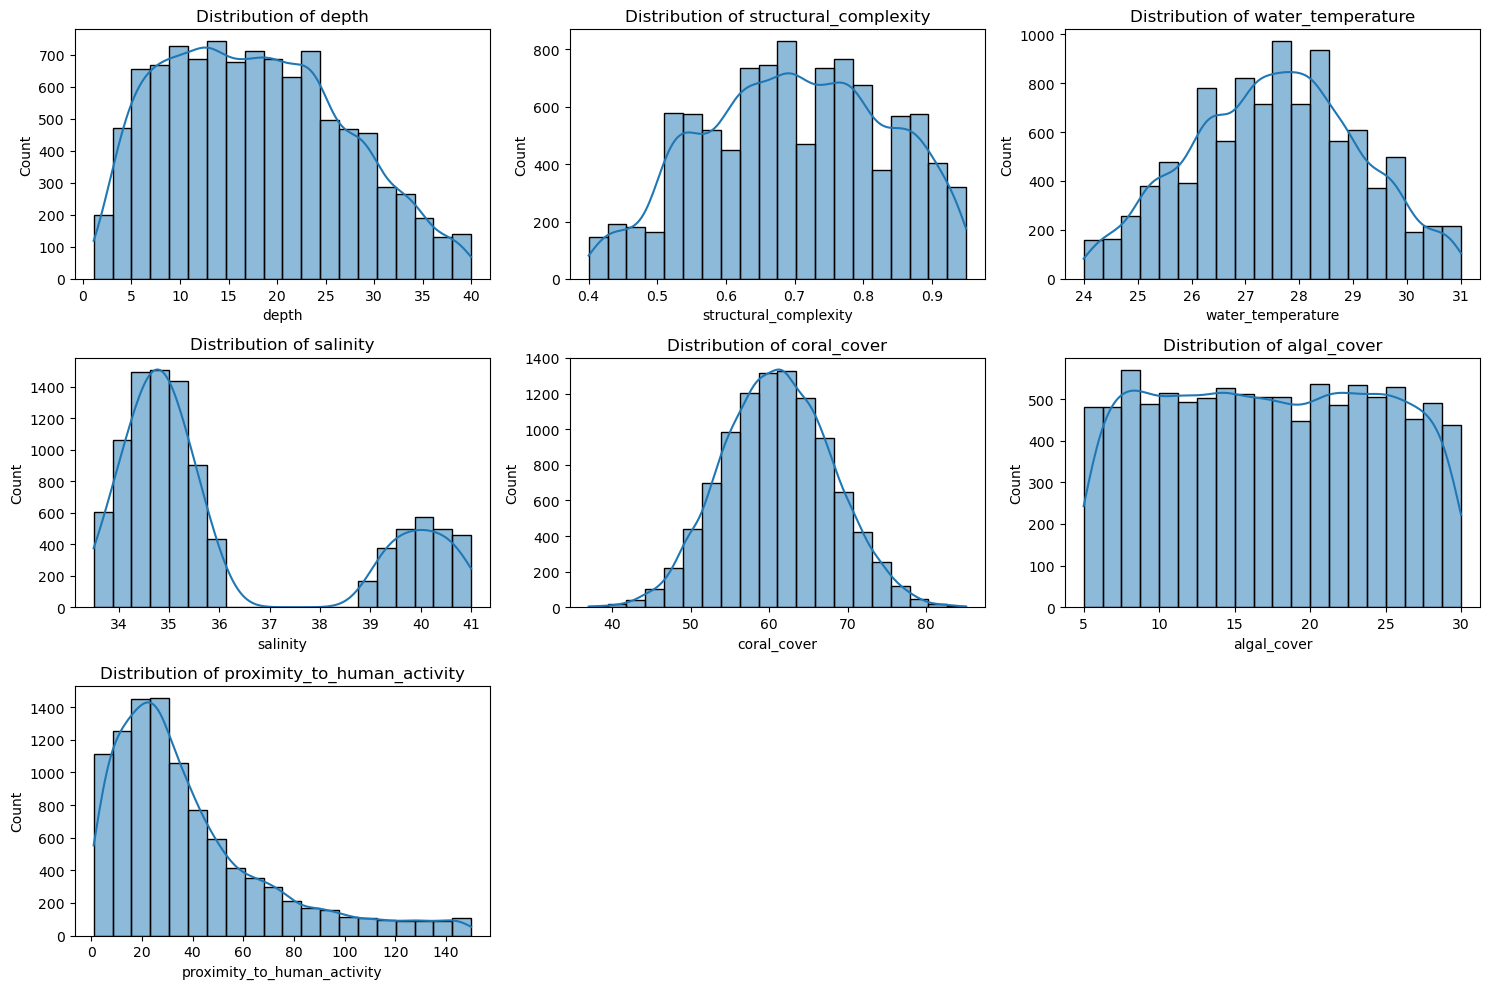

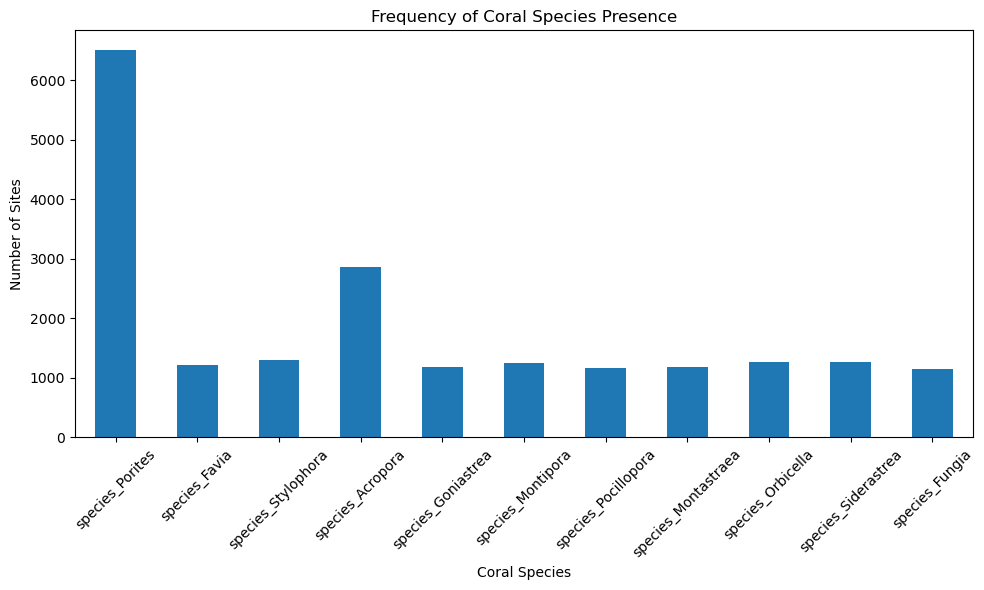

In [3]:
# Define feature and target columns
feature_cols = ['depth', 'structural_complexity', 'water_temperature', 'salinity', 
                'coral_cover', 'algal_cover', 'proximity_to_human_activity', 
                'region', 'substrate_type', 'light_availability', 'marine_protection_status']
coral_cols = [col for col in data.columns if col.startswith('species_')]
numeric_cols = ['depth', 'structural_complexity', 'water_temperature', 'salinity', 
                'coral_cover', 'algal_cover', 'proximity_to_human_activity']

# Plot distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot species frequency (Matplotlib)
plt.figure(figsize=(10, 6))
species_counts = data[coral_cols].sum()
species_counts.plot(kind='bar')
plt.title('Frequency of Coral Species Presence')
plt.xlabel('Coral Species')
plt.ylabel('Number of Sites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Preprocessing
# Copy data to avoid modifying original
data_processed = data.copy()

# Encode categorical features
le_region = LabelEncoder()
le_substrate = LabelEncoder()
le_light = LabelEncoder()
le_protection = LabelEncoder()

data_processed['region'] = le_region.fit_transform(data_processed['region'])
data_processed['substrate_type'] = le_substrate.fit_transform(data_processed['substrate_type'])
data_processed['light_availability'] = le_light.fit_transform(data_processed['light_availability'])
data_processed['marine_protection_status'] = le_protection.fit_transform(data_processed['marine_protection_status'])

# Split features and targets
X = data_processed[feature_cols]
y = data_processed[coral_cols]

# Scale numerical features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Verify preprocessing
print("\nPreprocessed Features (first 5 rows):")
print(X.head())


Preprocessed Features (first 5 rows):
      depth  structural_complexity  water_temperature  salinity  coral_cover  \
0  0.326327              -1.135556           0.807647  2.017798    -0.035669   
1  0.896588               1.210150          -0.345201  1.891487    -1.457818   
2 -0.704529               0.075131           0.231223  1.807280    -0.854482   
3  1.346217               0.529138          -0.601390  1.807280    -0.035669   
4 -0.594863               0.983146           1.384071  1.302037     0.553302   

   algal_cover  proximity_to_human_activity  region  substrate_type  \
0    -1.617854                    -0.331341       3               2   
1    -1.379980                    -1.116131       3               3   
2    -0.176616                    -0.006709       3               2   
3     1.418541                    -0.886052       3               3   
4    -0.526431                     0.948277       3               2   

   light_availability  marine_protection_status  
0  

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multi-label classifier
classifier = BinaryRelevance(RandomForestClassifier(random_state=42))
classifier.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [7]:
# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate
hamming = hamming_loss(y_test, y_pred)
subset_accuracy = accuracy_score(y_test, y_pred)

print(f"Hamming Loss: {hamming:.3f}")
print(f"Subset Accuracy: {subset_accuracy:.3f}")

# Per-species accuracy
from sklearn.metrics import accuracy_score
per_species_accuracy = {}
for col in coral_cols:
    per_species_accuracy[col] = accuracy_score(y_test[col], y_pred.toarray()[:, coral_cols.index(col)])
print("\nPer-Species Accuracy:")
for col, acc in per_species_accuracy.items():
    print(f"{col}: {acc:.3f}")

Hamming Loss: 0.121
Subset Accuracy: 0.198

Per-Species Accuracy:
species_Porites: 0.815
species_Favia: 0.876
species_Stylophora: 0.897
species_Acropora: 0.842
species_Goniastrea: 0.883
species_Montipora: 0.882
species_Pocillopora: 0.891
species_Montastraea: 0.893
species_Orbicella: 0.907
species_Siderastrea: 0.898
species_Fungia: 0.886


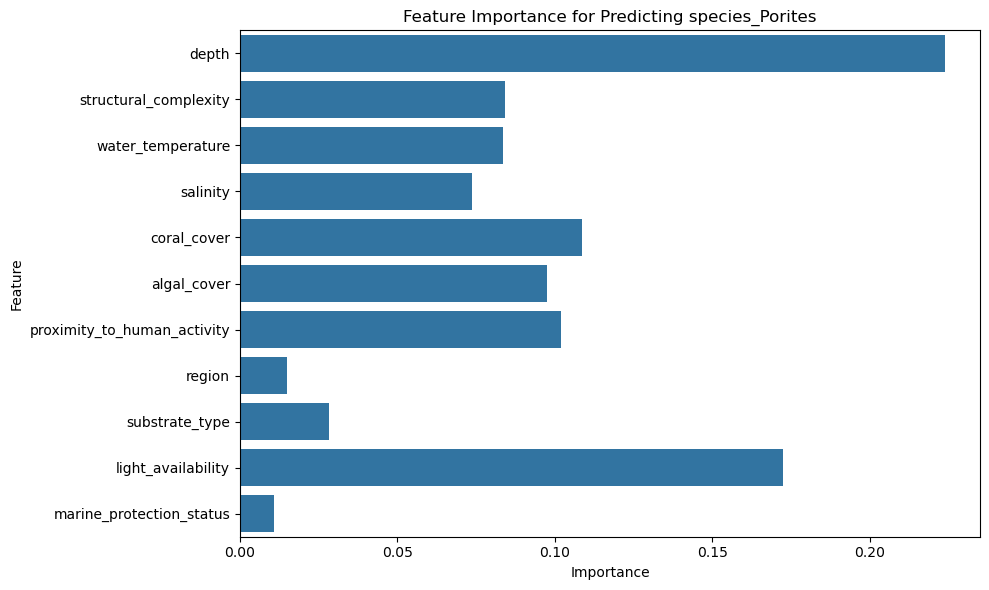

In [8]:
# Feature importance (for the first classifier, e.g., species_Porites)
feature_importance = classifier.classifiers_[0].feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance for Predicting species_Porites')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [9]:
pip install ipychart

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.0/2.2 MB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.2 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 1.4 MB/s eta 0:00:02
   ------------------- -------------------- 1.0


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
 pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 578.7 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 714.3 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 714.3 kB/s eta 0:00:02
   ----------------------- ---------------- 1.0/1.8 MB 751.1 kB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 799.2 kB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 839.1 kB/s eta 0:00:01
   ----------------------------------- ---- 1.6/

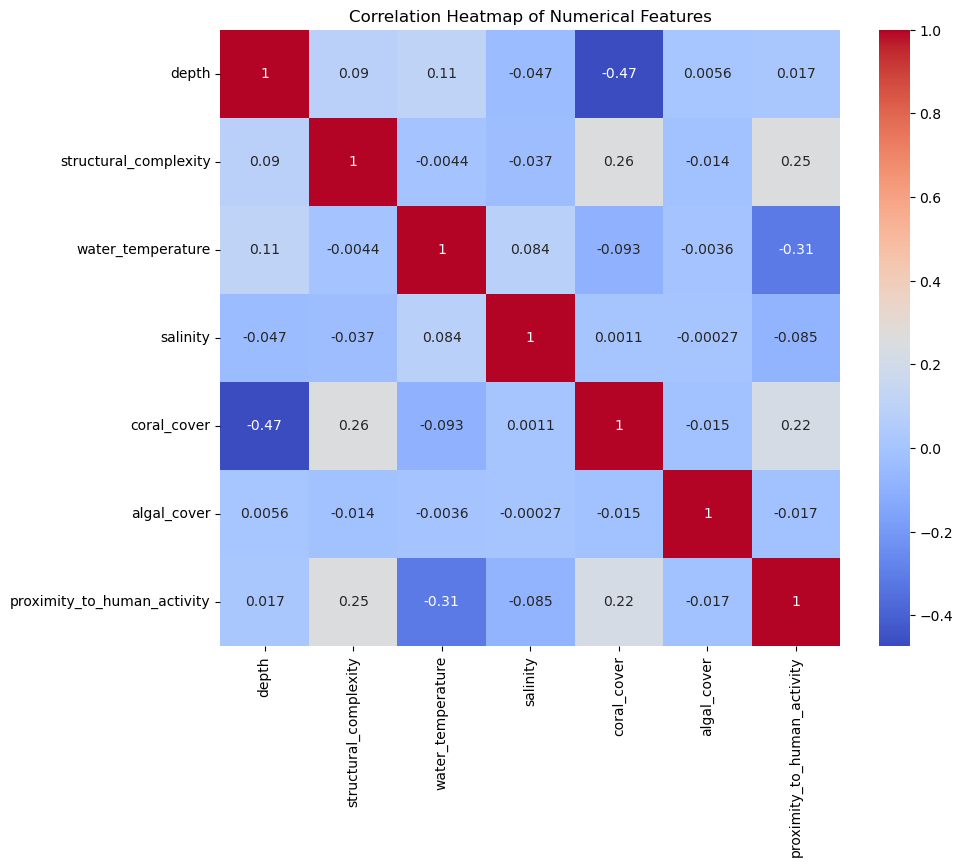

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [19]:
import joblib
joblib.dump(classifier, r"C:\Users\Tejas\OneDrive\Desktop\CORAL\data")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Tejas\\OneDrive\\Desktop\\CORAL\\data'

In [20]:
import joblib
import os

# Create a specific filename with extension instead of using just a directory
filename = "classifier_model.pkl"  # Give your model a proper filename with extension
save_path = os.path.join(r"C:\Users\Tejas\OneDrive\Desktop\CORAL\data", filename)

# Make sure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the model
joblib.dump(classifier, save_path)

# Alternative: Save to a location where you definitely have write permissions
# alternative_path = os.path.join(os.path.expanduser("~"), "classifier_model.pkl")
# joblib.dump(classifier, alternative_path)

['C:\\Users\\Tejas\\OneDrive\\Desktop\\CORAL\\data\\classifier_model.pkl']